# Partial Dependency vizsgálat

In [18]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date
import os
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import linear_model, datasets
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [19]:
def mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

MAPE: 4.7668743337898345 % on temperature: -9
MAPE: 4.7646776517386265 % on temperature: -8
MAPE: 4.765849572814542 % on temperature: -7
MAPE: 4.764340439479372 % on temperature: -6
MAPE: 4.763241075450756 % on temperature: -5
MAPE: 4.612141927766998 % on temperature: -4
MAPE: 4.489360790438814 % on temperature: -3
MAPE: 3.047352811583441 % on temperature: -2
MAPE: 2.8976115695466236 % on temperature: -1
MAPE: 2.880618712041385 % on temperature: 0
MAPE: 2.880710140914135 % on temperature: 1
MAPE: 2.8105338585335775 % on temperature: 2
MAPE: 2.810667785698454 % on temperature: 3
MAPE: 2.571771022641495 % on temperature: 4
MAPE: 2.57283722819892 % on temperature: 5
MAPE: 2.5299672874543413 % on temperature: 6
MAPE: 2.5095193565572487 % on temperature: 7
MAPE: 2.4862747276667427 % on temperature: 8
MAPE: 2.491060259774692 % on temperature: 9
MAPE: 2.4913974720339414 % on temperature: 10
MAPE: 2.5164400979959827 % on temperature: 11
MAPE: 2.5167983110704006 % on temperature: 12
MAPE: 2.516

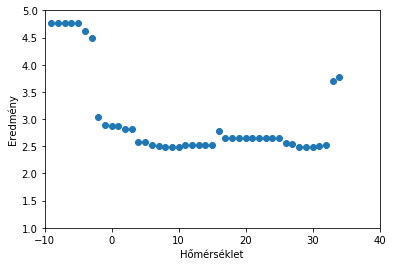

In [54]:
data = pd.read_csv('Data_Expansion.csv')

TARGET = 'system_load'
data['target'] = data[TARGET].copy()
data.__delitem__(TARGET)
data.__delitem__('min')
data.__delitem__('rain')
data.__delitem__('snow')
data.__delitem__('avg_max')
data.__delitem__('avg_min')
data.__delitem__('export')
data.__delitem__('import')
data.__delitem__('avg_sysload')
data.__delitem__('avg_import')
data.__delitem__('avg_export')
data.__delitem__('std_sysload')
data.__delitem__('std_import')
data.__delitem__('std_export')

for x in [24,48,96,168]:
    data["Lag"+str(x)]=data['target'].shift(x) 
data = data.rename(index=str, columns={'max': 'temp'})    
data = data.dropna()
results = pd.DataFrame(columns = {'mape', 'temp'})

train = data.drop(['date', 'target'], axis=1)

for temp in range(data['temp'].min(), data['temp'].max()):
    model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
    test = data.drop(['date', 'target'], axis=1)
    test['temp'] = temp
    model.fit(train, data['target'])
    test['prediction'] = model.predict(test)
    results.loc[len(results)] = ([mape(data['target'], test['prediction']), temp])
    print('MAPE: {} % on temperature: {}'.format(mape(data['target'], test['prediction']), temp)) 
    test = []
    model = []

print(results)    
plt.scatter(results['temp'], results['mape'])
plt.xlabel('Hőmérséklet')
plt.ylabel('Eredmény')
plt.axis([-10, 40, 1, 5])
plt.show()